In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/home/julio/jupyter_files/CancerDiagnostico/data.csv",header=0)

**Nombre de las columnas**
1) ID number

2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Calcula el porcentaje de valores nulos por columna
percent_missing = df.isnull().mean() * 100

# Muestra el porcentaje de valores nulos
print(percent_missing)

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
# Borra la columna 'nombre_columna'
df = df.drop(columns=['Unnamed: 32'])

<H2>2 Random Forrest</H2>

**2.1 Importar Librerías y Cargar Datos**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1=df.copy()

**2.2. Convertir la Variable Categórica**
La columna diagnosis es categórica y necesita ser convertida en números:

LabelEncoder: Convierte las etiquetas categóricas en valores numéricos. Los modelos de machine learning requieren datos numéricos para procesar la información.


In [18]:
# Convertir 'diagnosis' a valores numéricos
label_encoder = LabelEncoder()
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])

**2.3. Separar Características y Etiquetas**

In [20]:
# Separar las características (X) y la etiqueta (y)
X = df1.drop(columns=['id', 'diagnosis'])  # Excluye 'id' y 'diagnosis'
y = df1['diagnosis']

**Explicación:**

**Características (X):** Contiene las columnas que utilizaremos para hacer predicciones. Excluimos 'id' porque no es útil para el modelo.

**Etiqueta (y):** Contiene la columna que queremos predecir (en este caso, diagnosis).

**2.4. Dividir el Conjunto de Datos**

In [22]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explicación:**

**train_test_split:** Divide los datos en dos conjuntos: uno para entrenar el modelo (X_train, y_train) y otro para evaluarlo (X_test, y_test). Esto asegura que el modelo sea evaluado en datos que no ha visto durante el entrenamiento.

**test_size=0.2:** Indica que el 20% de los datos se utilizarán para la prueba y el 80% para el entrenamiento.

**random_state=42:** Asegura que la división de los datos sea reproducible.

**2.5. Escalar los Datos**

In [23]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Explicación:**

**Escalado de Datos:** Ajusta las características para que tengan una escala similar, lo que puede mejorar el rendimiento del modelo. Aunque Random Forest no es tan sensible a la escala, es una buena práctica para otros modelos y para mantener consistencia.

**2.6 Crear y Entrenar el Modelo**

**Objetivo:** Crear y entrenar el modelo de machine learning.

**2.6.1 Ajustar Hiperparámetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de particiones en la validación cruzada
                           n_jobs=-1,  # Utiliza todos los núcleos disponibles
                           verbose=2)  # Muestra el progreso

# Ajustar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print(f'Best Parameters: {grid_search.best_params_}')


**GridSearchCV:** Prueba diferentes combinaciones de hiperparámetros para encontrar la mejor configuración del modelo.

**n_estimators:**  Este parámetro define el número de árboles en el bosque (Random Forest). Aumentar el número de árboles generalmente mejora el rendimiento del modelo, ya que se reduce la variabilidad y se aumenta la capacidad de generalización. Sin embargo, también aumenta el tiempo de entrenamiento y la complejidad computacional.

**max_depth:** Este parámetro controla la profundidad máxima de cada árbol de decisión en el bosque. Limitar la profundidad de los árboles puede prevenir el sobreajuste al evitar que los árboles se ajusten demasiado a los datos de entrenamiento. Profundidades más grandes pueden capturar más patrones, pero también pueden llevar a un sobreajuste.

**min_samples_split:** Este parámetro define el número mínimo de muestras requeridas para dividir un nodo interno en el árbol de decisión. Un valor más alto para min_samples_split puede hacer que el modelo sea más general, evitando divisiones excesivas en los árboles. Un valor más bajo permite divisiones más detalladas, pero puede llevar a un sobreajuste.

**min_samples_leaf:** Este parámetro define el número mínimo de muestras que debe haber en una hoja de un árbol de decisión.Un valor más alto para min_samples_leaf puede hacer que el modelo sea más robusto al exigir un mínimo de muestras en cada hoja, evitando divisiones que podrían ser demasiado específicas para los datos de entrenamiento.

**2.6.2 Entrenar el Modelo con los Mejores Hiperparámetros**

In [31]:
# Crear el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total 

**best_estimator_:** Utiliza los mejores hiperparámetros encontrados en la búsqueda en malla para crear el modelo.

**2.7 Hacer Predicciones y Evaluar el Modelo** 

In [32]:
# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**predict():** Realiza predicciones sobre el conjunto de prueba.

**accuracy_score:** Calcula la proporción de predicciones correctas.

**classification_report:** Proporciona métricas detalladas del rendimiento del modelo.

**2.7.2 Validación Cruzada**

In [42]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
RF_scoremean=cv_scores.mean()
print(f'Mean CV Score: {cv_scores.mean()}')



Cross-Validation Scores: [0.92105263 0.93859649 0.98245614 0.95614035 0.97345133]
Mean CV Score: 0.9543393882937432


**cross_val_score:** Esta función realiza la validación cruzada del modelo (best_model) en el conjunto de datos (X y y).

**cv=5:** Esto especifica que se realizará una validación cruzada de 5 pliegues (folds). Los datos se dividen en 5 partes: 4 se usan para entrenar el modelo y 1 para evaluarlo. Esto se repite 5 veces, y cada pliegue actúa como conjunto de prueba exactamente una vez.

**2.7.3 Visualizar Importancia de Características**

In [40]:
# Visualizar la importancia de características
feature_importances = best_model.feature_importances_
features = X.columns

# Crear un DataFrame para la visualización
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

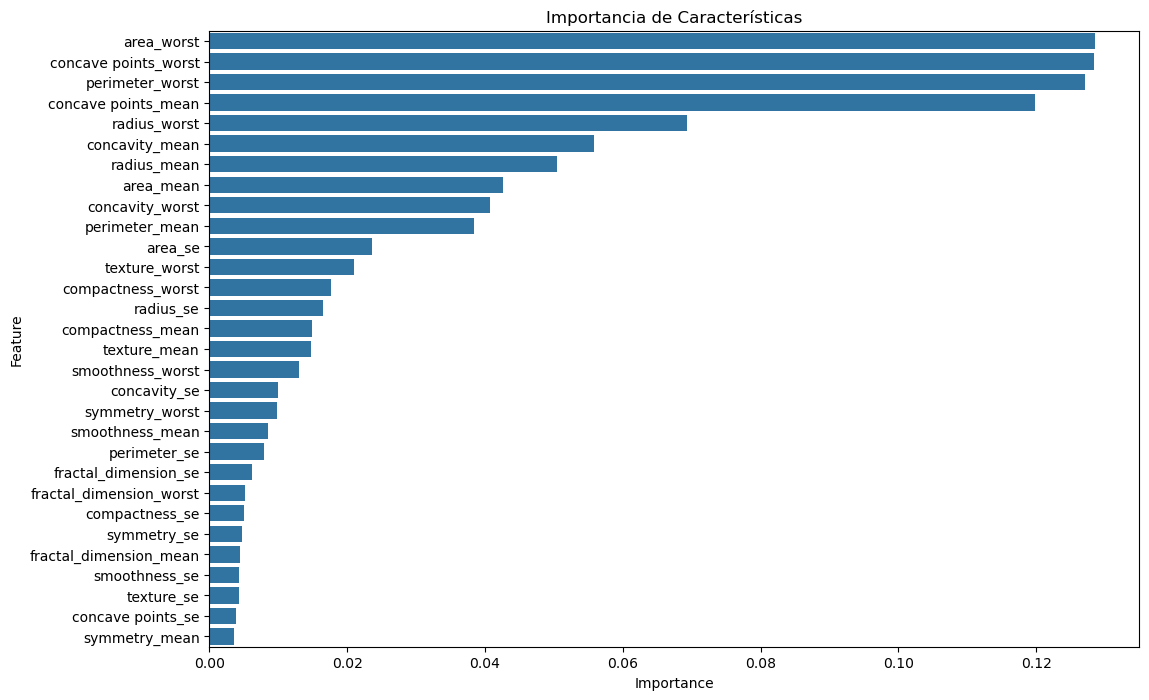

In [41]:
# Graficar
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Importancia de Características')
plt.show()

In [43]:
#    'KNN': KNeighborsClassifier(),
#    'Gradient Boosting': GradientBoostingClassifier(),
#    'XGBoost': xgb.XGBClassifier(),
#    'Neural Network': MLPClassifier(),
#    'Naive Bayes': GaussianNB()

<H2>3 SVM</H2>

**3.1 Importar Bibliotecas y Cargar Datos**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**3.2 Preparar los datos**

In [23]:
# Supongamos que 'df1' es tu DataFrame y 'diagnosis' es la variable objetivo
df1=df.copy()
# Convertir 'diagnosis' a valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])

# Separar las variables predictoras y la variable objetivo
X = df1.drop(columns=['id', 'diagnosis','Unnamed: 32'])  # Excluye 'id' y 'diagnosis'  # Variables predictoras
y = df1['diagnosis']               # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3.3 Crear y Ajustar el Modelo SVM**

In [24]:
# Crear el modelo SVM
model = SVC()

**SVC()** está diseñado específicamente para problemas de clasificación. Utiliza un hiperplano para separar diferentes clases en el espacio de características, lo que lo hace adecuado para tareas de clasificación binaria y multiclase.

In [25]:
# Definir los hiperparámetros para la búsqueda en rejilla
param_grid = {
    'C': [0.1, 1, 10],  # Menor número de valores para C
    'kernel': ['linear'],  # Solo kernel lineal para simplificar
    'gamma': ['scale']  # Solo usar gamma='scale'
}

**C:** Parámetro de regularización que controla el equilibrio entre maximizar el margen y minimizar el error de clasificación.

**kernel:** Tipo de función de núcleo utilizada para transformar los datos.

**gamma:** Parámetro del núcleo RBF que define cómo influyen los puntos de entrenamiento en la predicción.

In [26]:
# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [27]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear']},
             scoring='accuracy')

In [28]:
# Imprimir los mejores parámetros y el mejor score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9647784810126583


In [29]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

**3.4 Evaluar el Modelo**

In [31]:
# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.93859649 0.93859649 0.97368421 0.93859649 0.96460177]
Mean CV Score: 0.9508150908244062


In [32]:
# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

In [33]:
# Evaluar el rendimiento en el conjunto de prueba
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9649122807017544


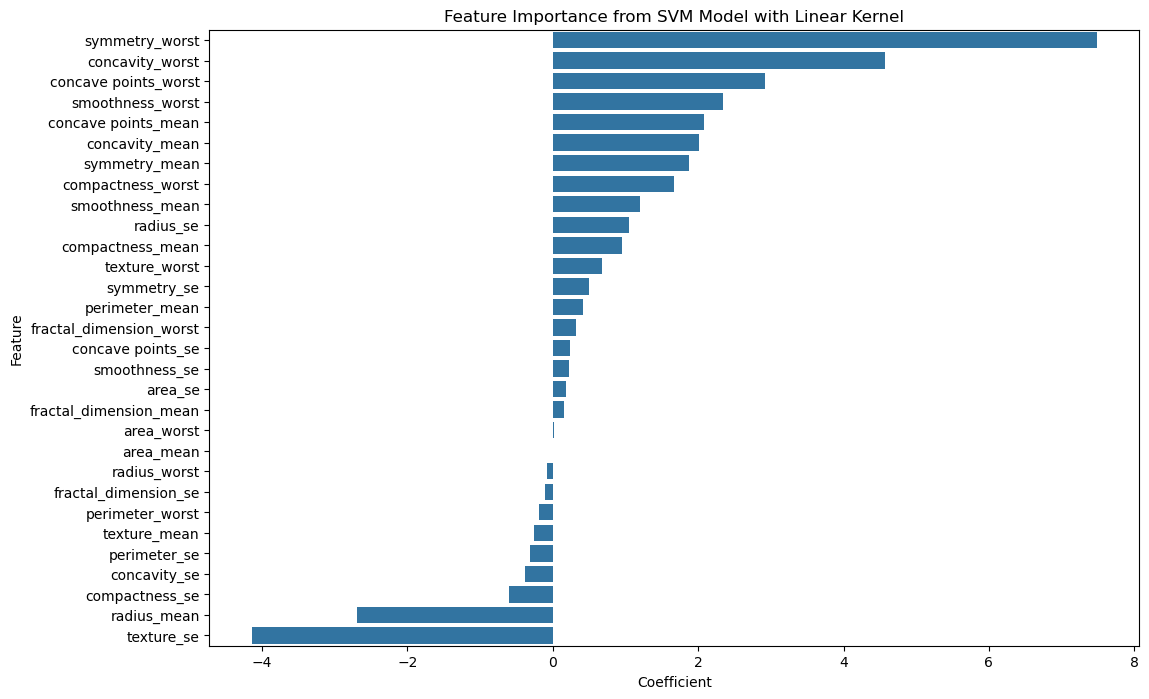

In [34]:
# Verificar si el kernel es 'linear'
if best_model.kernel == 'linear':
    # Obtener los coeficientes del modelo
    coefficients = best_model.coef_[0]
    
    # Crear un DataFrame para visualizar las importancias
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Plotear las importancias
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importances)
    plt.title('Feature Importance from SVM Model with Linear Kernel')
    plt.show()
else:
    print("El kernel no es lineal. La importancia de las características no se puede visualizar directamente.")


<H2>4 Regresión Logística</H2>

**4.1 Importar Librerías**

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

**4.2 Preparar los Datos**

In [52]:
# Supongamos que 'df1' es tu DataFrame y 'diagnosis' es la variable objetivo
df1 = df.copy()

# Convertir 'diagnosis' a valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])

# Separar las variables predictoras y la variable objetivo
X = df1.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])  # Excluye 'id' y 'Unnamed: 32' si existe
y = df1['diagnosis']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**4.3 Construir y Optimizar el Modelo**

In [53]:
# Inicializar el modelo
log_reg = LogisticRegression(max_iter=1000)

In [54]:
# Definir el rango de hiperparámetros a probar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización inversa
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Algoritmo de optimización
    'penalty': ['l2']  # Tipo de penalización
}


**C**:controla la fuerza de la regularización en el modelo de regresión logística. Un valor pequeño de C implica una mayor regularización, lo que significa que el modelo es más penalizado por tener coeficientes grandes. Esto ayuda a evitar el sobreajuste (overfitting) pero puede llevar a un modelo menos preciso si la regularización es demasiado fuerte. Un valor grande de C reduce el efecto de la regularización, permitiendo que el modelo ajuste más estrechamente los datos de entrenamiento. Esto puede llevar a un mejor ajuste a los datos pero aumenta el riesgo de sobreajuste.

**solver**: El hiperparámetro solver especifica el algoritmo utilizado para encontrar el óptimo de la función de coste durante el entrenamiento del modelo. 
**Opciones:**

*'newton-cg':* Usa el método de Newton conjugado. Es adecuado para problemas grandes y generalmente converge rápidamente.

*'lbfgs':* Utiliza el método de optimización L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno). Es eficaz para problemas con una gran cantidad de características.

*'liblinear':* Utiliza el optimizador de funciones lineales. Es adecuado para problemas pequeños a medianos y puede ser más rápido para conjuntos de datos más pequeños.

*'saga':* Es una variante de 'saga' que funciona bien con grandes conjuntos de datos y también puede manejar regularización L1.


**penalty:** define el tipo de regularización que se aplica al modelo para prevenir el sobreajuste. *'l2':* Aplica regularización L2, que penaliza la suma de los cuadrados de los coeficientes. Esto ayuda a reducir la magnitud de los coeficientes pero no necesariamente los lleva a cero.
*'l1' (no está en tu configuración):* Aplica regularización L1, que penaliza la suma de los valores absolutos de los coeficientes. Esto puede llevar a algunos coeficientes a ser exactamente cero, lo que puede realizar selección de características.

In [55]:
# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

In [56]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [57]:
# Mejor modelo
best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


**Evaluar el Modelo**

In [58]:
# Realizar predicciones
y_pred = best_model.predict(X_test)

In [59]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9707602339181286


In [60]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [61]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[105   3]
 [  2  61]]


**Matriz de Confusión Desglosada**

**Filas:** Representan las clases verdaderas.

**Columnas:** Representan las clases predichas por el modelo.


**[105 3]:**

105: Número de veces que la clase verdadera 0 (supongamos "Benigno") fue correctamente clasificada como 0.

3: Número de veces que la clase verdadera 0 fue incorrectamente clasificada como 1 (supongamos "Maligno").

**[2 61]:**

2: Número de veces que la clase verdadera 1 (supongamos "Maligno") fue incorrectamente clasificada como 0.

61: Número de veces que la clase verdadera 1 fue correctamente clasificada como 1.

**Interpretación General**

Verdaderos Positivos (VP): 61 (casos de clase 1 correctamente identificados como 1)

Falsos Positivos (FP): 3 (casos de clase 0 incorrectamente identificados como 1)

Falsos Negativos (FN): 2 (casos de clase 1 incorrectamente identificados como 0)

Verdaderos Negativos (VN): 105 (casos de clase 0 correctamente identificados como 0)

**Validación Cruzada**

In [62]:
# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.94736842 0.95614035 0.96491228 0.97368421 0.97345133]
Mean CV Score: 0.9631113181183046


/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


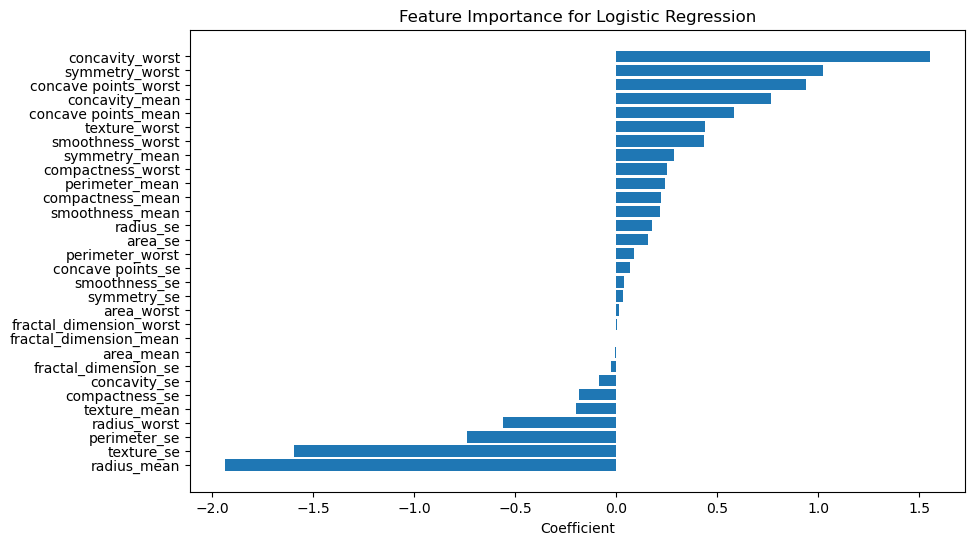

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Supongamos que X_train y y_train están definidos y no contienen NaNs.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Verifica el tipo de regresión logística y si el atributo coef_ está presente
if hasattr(log_reg, 'coef_'):
    coefficients = log_reg.coef_[0]  # Para regresión logística binaria
    feature_names = X_train.columns

    # Crear un DataFrame con los coeficientes y las características
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Graficar las características más importantes
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Coefficient'])
    plt.xlabel('Coefficient')
    plt.title('Feature Importance for Logistic Regression')
    plt.gca().invert_yaxis()  # Invertir el eje y para tener las características más importantes en la parte superior
    plt.show()
else:
    print("El modelo no tiene el atributo coef_")

<H2>5 Árbol de Decisión</H2>

**5.1 Importar Librerías**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

**5.2 Preparar los Datos**

In [81]:
# Preparar los datos
df1 = df.copy()  # Clonar el DataFrame original
# Convertir 'diagnosis' a valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])

# Separar las variables predictoras y la variable objetivo
X = df1.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])  # Excluir columnas no relevantes
y = df1['diagnosis']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**5.3 Inicializar el Modelo de Árbol de Decisión**

In [68]:
# Inicializar el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)

In [69]:
# Definir los parámetros a probar para la optimización
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**criterion:** Especifica la función de puntuación utilizada para evaluar la calidad de una división en los nodos del árbol.*gini*: Usa el índice de Gini para medir la pureza de los nodos. *entropy*: Usa la ganancia de información para medir la pureza de los nodos.

**max_depth:** Limita la profundidad máxima del árbol. Un árbol más profundo puede modelar más complejidades, pero también puede llevar a sobreajuste (overfitting).

**min_samples_split:** El número mínimo de muestras requeridas para dividir un nodo interno. Ayuda a controlar el tamaño del árbol y prevenir el sobreajuste.

**min_samples_leaf:** El número mínimo de muestras necesarias para estar en una hoja. Ayuda a asegurar que cada hoja del árbol tenga un número mínimo de muestras.

In [70]:
# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [71]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [73]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

In [83]:
# Imprimir la matriz de confusión y el reporte de clasificación
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[106   2]
 [  5  58]]


In [84]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.96


<H2> 6  ANN(Multi-layer Perceptron)</H2>

**6.1 Importar Librerías**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**6.2 Preparar los Datos**

In [68]:
# Supongamos que df1 es tu DataFrame y 'diagnosis' es la variable objetivo
df1 = df.copy()  # Copia del DataFrame original

# Convertir 'diagnosis' a valores numéricos usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])

# Separar las variables predictoras y la variable objetivo
X = df1.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])  # Excluye 'id' y 'diagnosis'
y = df1['diagnosis']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6.3 Inicializar y Ajustar el Modelo**

In [69]:
# Inicializar el modelo de red neuronal
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

**6.4 Evaluar el Modelo**

In [70]:
# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

In [71]:
# Imprimir el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



**6.5 Optimización de Hiperparámetros**

In [72]:
# Definir el rango de hiperparámetros a probar de manera más compacta
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Menos combinaciones
    'activation': ['relu'],  # Solo la función de activación más prometedora
    'solver': ['adam'],  # Solo el algoritmo de optimización más eficiente
    'alpha': [0.0001, 0.001],  # Menos valores para el término de regularización
    'learning_rate': ['adaptive'],  # Solo la estrategia de ajuste de tasa de aprendizaje más efectiva
}


In [73]:
# Configurar la búsqueda en malla
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

In [74]:
# Ajustar la búsqueda en malla
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['adaptive'], 'solver': ['adam']},
             verbose=1)

In [75]:
# Imprimir los mejores parámetros encontrados
print("Best Parameters found: ", grid_search.best_params_)

Best Parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [76]:
# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [77]:
# Imprimir el reporte de clasificación para el mejor modelo
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [78]:
# Imprimir la matriz de confusión para el mejor modelo
print("\nBest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best Model Confusion Matrix:
[[71  0]
 [ 7 36]]


In [79]:
# Calcular y mostrar la precisión (accuracy) para el mejor modelo
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.2f}')

Best Model Accuracy: 0.94


In [80]:
tabla = {'':['Accuracy','Mean CV Score'],
    'RandomForestClassifier': [0.9649122807017544,0.9543393882937432],
    'SVC': [0.9649122807017544, 0.9508150908244062],
    'LogisticRegression': [0.9707602339181286, 0.9631113181183046],
    'DecisionTreeClassifier':[0.96,None],
    'ANN MLPClassifier':[0.94,None]
}



# Crear el DataFrame
df_tabla = pd.DataFrame(tabla)

In [81]:
df_tabla

,,RandomForestClassifier,SVC,LogisticRegression,DecisionTreeClassifier,ANN MLPClassifier
0,Accuracy,0.964912,0.964912,0.970760,0.96,0.94
1,Mean CV Score,0.954339,0.950815,0.963111,NaN,NaN


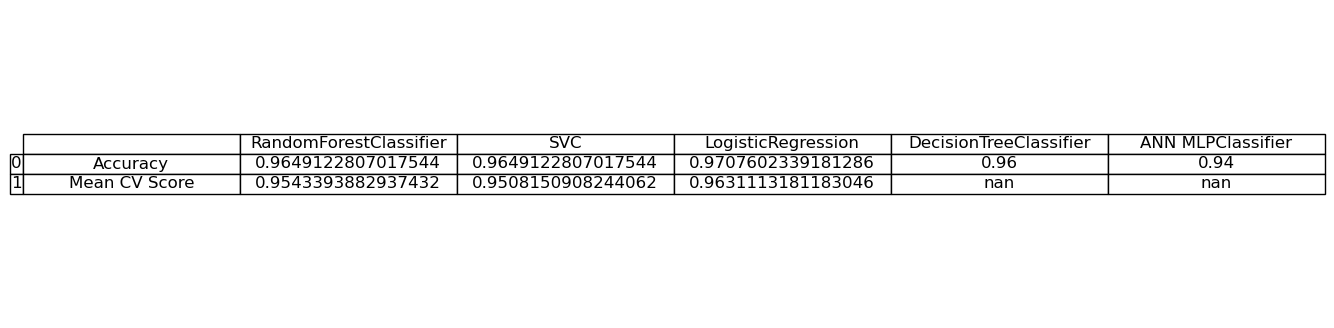

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_tabla ya está definido
# df_tabla = pd.DataFrame({...})  # Define tu DataFrame aquí si es necesario

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(14, 4))  # Ajusta el tamaño de la figura si es necesario

# Ocultar el eje
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Crear una tabla a partir del DataFrame
tabla = ax.table(cellText=df_tabla.values,
                 colLabels=df_tabla.columns,
                 rowLabels=df_tabla.index,
                 cellLoc='center',
                 loc='center')

# Ajustar el tamaño de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)  # Ajusta el tamaño de la tabla si es necesario

# Guardar la imagen en formato JPEG en la misma ruta de origen
plt.savefig('df_tabla.jpg', format='jpeg', bbox_inches='tight', pad_inches=0.1, dpi=300)

# Mostrar la tabla (opcional)
plt.show()
